In [1]:
#IMPORT LIBRARIES 
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import math 
import seaborn as sn



dataset=pd.read_csv("database Norm Log.csv",sep=";")  #Without CoefCorre<0.2
#print(dataset.head(2))

array([[<AxesSubplot:title={'center':'Monthly Revenue Log Norm'}>]],
      dtype=object)

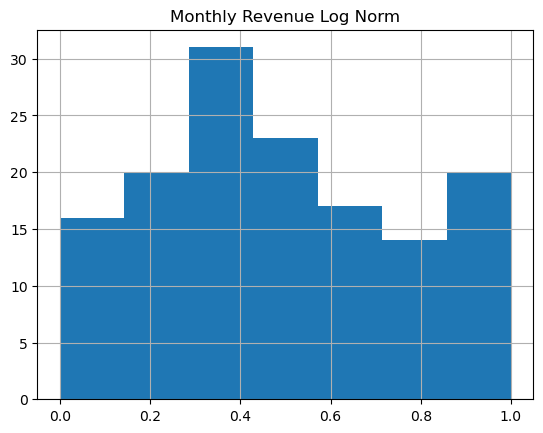

In [2]:
## Check if Y is normal

dataset.hist(column='Monthly Revenue Log Norm',bins=7)

<Figure size 640x480 with 0 Axes>

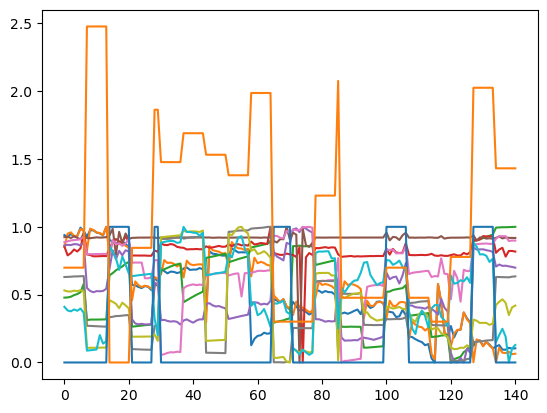

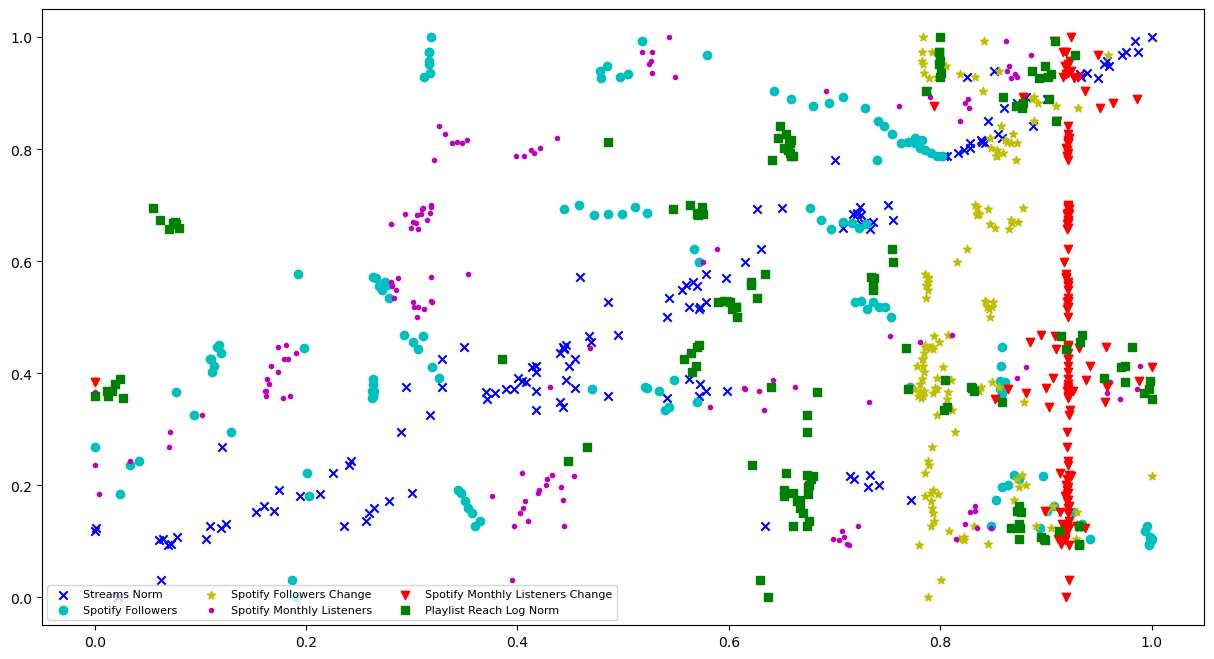

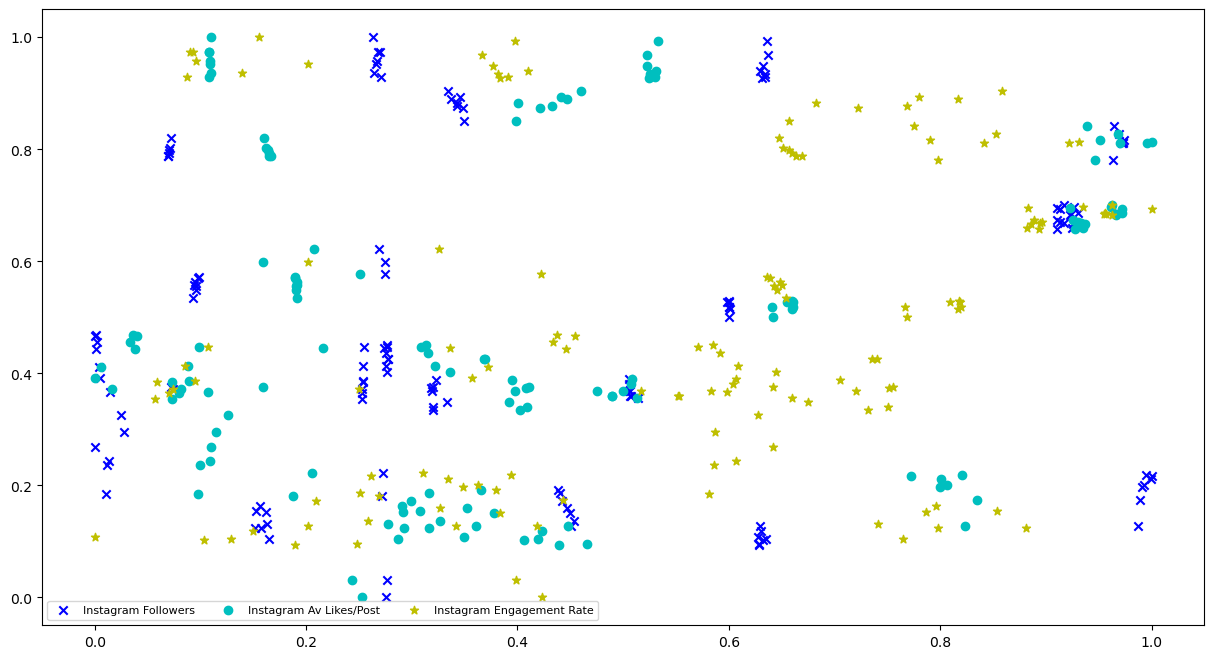

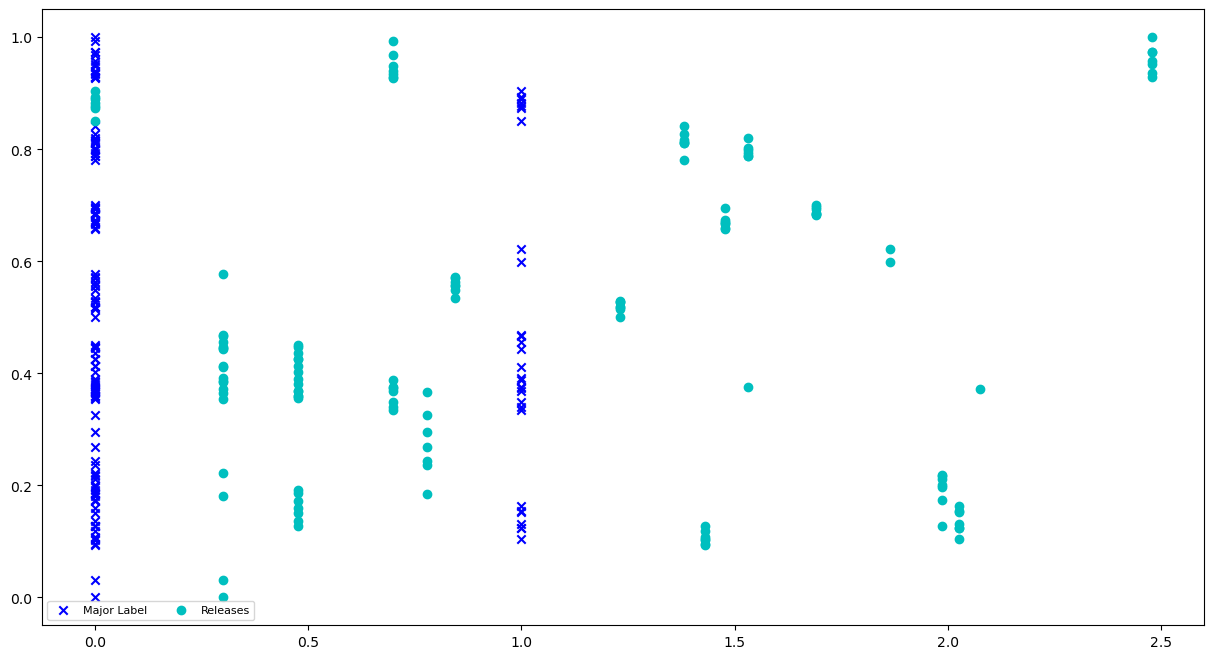

In [3]:
##PLOT INDIVIDUAL FEATURES

plt.figure()
dataset.plot(legend=False)

#Scatter plot SPOTIFY
plt.figure(figsize = (15,8))
colors = ['b', 'c', 'y', 'm', 'r','g']
st = plt.scatter(dataset['Streams Norm Log'], dataset['Monthly Revenue Log Norm'], marker='x', color=colors[0])
sf = plt.scatter(dataset['Spotify Followers Log Norm'], dataset['Monthly Revenue Log Norm'], marker='o', color=colors[1])
sfc = plt.scatter(dataset['Spotify Followers Change Log Norm'], dataset['Monthly Revenue Log Norm'], marker='*', color=colors[2])
sm = plt.scatter(dataset['Spotify Monthly Listeners Log Norm'], dataset['Monthly Revenue Log Norm'], marker='.', color=colors[3])
smc = plt.scatter(dataset['Spotify Monthly Listeners Change Log Norm'], dataset['Monthly Revenue Log Norm'], marker='v', color=colors[4])
sp = plt.scatter(dataset['Playlist Reach Log Norm'], dataset['Monthly Revenue Log Norm'], marker='s', color=colors[5])
plt.legend((st, sf,sfc,sm,smc,sp),
           ('Streams Norm', 'Spotify Followers', 'Spotify Followers Change', 'Spotify Monthly Listeners', 'Spotify Monthly Listeners Change', 'Playlist Reach Log Norm'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

plt.show()

#Scatter plot INSTAGRAM
plt.figure(figsize = (15,8))
colors = ['b', 'c', 'y']
inf = plt.scatter(dataset['Instagram Followers Log Norm'], dataset['Monthly Revenue Log Norm'], marker='x', color=colors[0])
ina = plt.scatter(dataset['Instagram Av Likes/Post Log Norm'], dataset['Monthly Revenue Log Norm'], marker='o', color=colors[1])
ine = plt.scatter(dataset['Instagram Engagement Log Norm'], dataset['Monthly Revenue Log Norm'], marker='*', color=colors[2])
plt.legend((inf, ina,ine),
           ('Instagram Followers', 'Instagram Av Likes/Post', 'Instagram Engagement Rate'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

plt.show()

#Scatter plot Extra
plt.figure(figsize = (15,8))
colors = ['b', 'c']
ml = plt.scatter(dataset['Major Label'], dataset['Monthly Revenue Log Norm'], marker='x', color=colors[0])
rel = plt.scatter(dataset['Releases Log'], dataset['Monthly Revenue Log Norm'], marker='o', color=colors[1])
plt.legend((inf, rel),
           ('Major Label', 'Releases'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

plt.show()

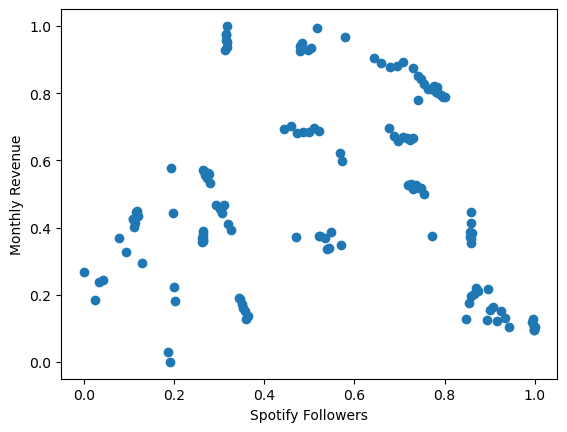

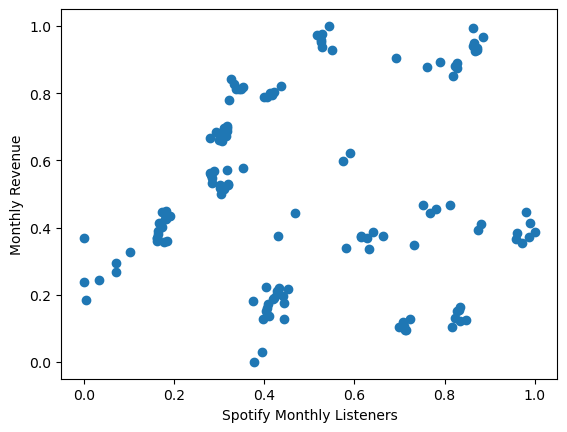

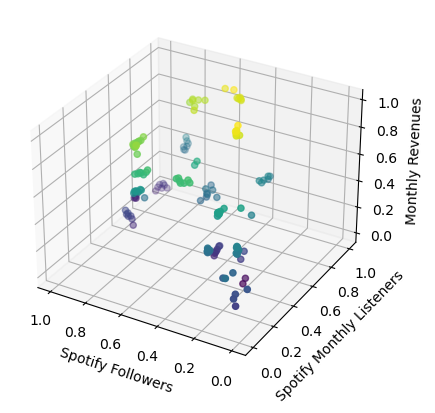

In [4]:
import numpy as np
#Scatter plot only spotify foll
fig=plt.figure()
ax = fig.add_subplot()
sf=ax.scatter(dataset['Spotify Followers Log Norm'], dataset['Monthly Revenue Log Norm'], marker='o')
ax.set_xlabel('Spotify Followers')
ax.set_ylabel('Monthly Revenue')

plt.show()
#Scatter plot only spotify monthl
fig=plt.figure()
ax = fig.add_subplot()
sf=ax.scatter(dataset['Spotify Monthly Listeners Log Norm'], dataset['Monthly Revenue Log Norm'], marker='o')
ax.set_xlabel('Spotify Monthly Listeners')
ax.set_ylabel('Monthly Revenue')

plt.show()
#Scatter plot 3D
fig=plt.figure()
ax = fig.add_subplot(projection='3d')
sf=ax.scatter(dataset['Spotify Followers Log Norm'], dataset['Spotify Monthly Listeners Log Norm'], dataset['Monthly Revenue Log Norm'],  marker='o', c=dataset['Monthly Revenue Log Norm'])
ax.set_xlabel('Spotify Followers')
ax.set_ylabel('Spotify Monthly Listeners')
ax.set_zlabel('Monthly Revenues')
ax.invert_xaxis()
plt.show()


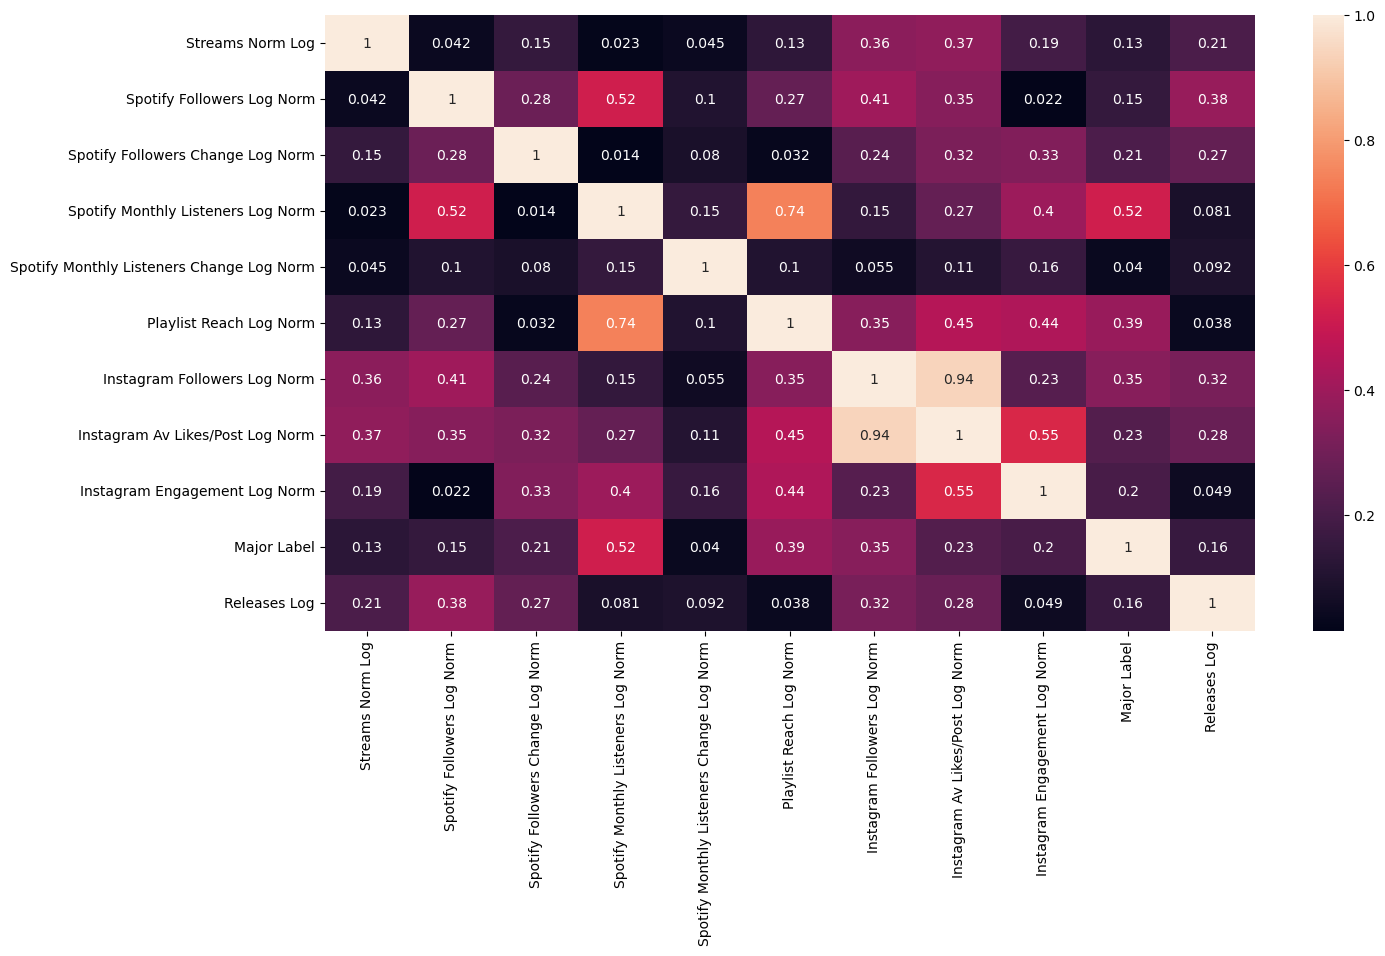

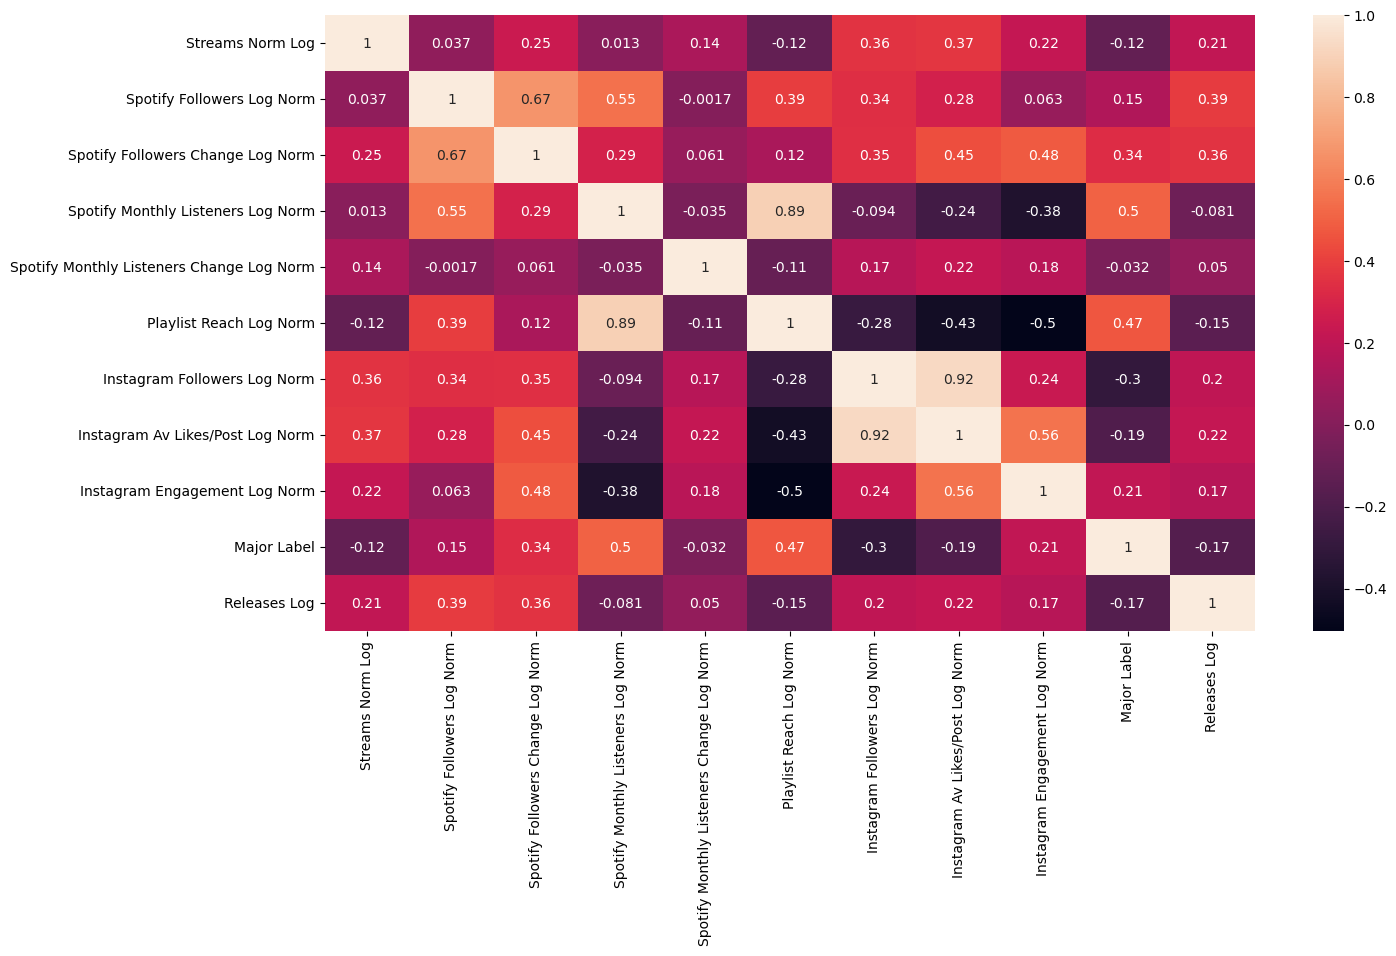

Columns to drop:  ['Instagram Av Likes/Post Log Norm']
Dataset before discarding CORRELATION variables:

 ['Monthly Revenue Log Norm' 'Streams Norm Log'
 'Spotify Followers Log Norm' 'Spotify Followers Change Log Norm'
 'Spotify Monthly Listeners Log Norm'
 'Spotify Monthly Listeners Change Log Norm' 'Playlist Reach Log Norm'
 'Instagram Followers Log Norm' 'Instagram Av Likes/Post Log Norm'
 'Instagram Engagement Log Norm' 'Major Label' 'Releases Log'] 

Dataset after discarding CORRELATION variables:

 ['Monthly Revenue Log Norm' 'Streams Norm Log'
 'Spotify Followers Log Norm' 'Spotify Followers Change Log Norm'
 'Spotify Monthly Listeners Log Norm'
 'Spotify Monthly Listeners Change Log Norm' 'Playlist Reach Log Norm'
 'Instagram Followers Log Norm' 'Instagram Engagement Log Norm'
 'Major Label' 'Releases Log'] 

Columns to drop:  ['Playlist Reach Log Norm', 'Instagram Av Likes/Post Log Norm']
Dataset before discarding SPEARMAN variables:

 ['Monthly Revenue Log Norm' 'Streams Norm

In [5]:
##FEATURES SELECTION
import statsmodels.api as sm


#<-- 1) Discard Correlated features -->

# Create correlation matrix
correlationMatrix = dataset.drop(columns=["Monthly Revenue Log Norm"]).corr().abs()

# Select upper triangle of correlation matrix
upper = correlationMatrix.where(np.triu(np.ones(correlationMatrix.shape),k=1).astype(bool))
plt.figure(figsize = (15,8))
sn.heatmap(correlationMatrix, annot=True)
plt.show()

#Spearman correlation
correlationMatrixSp = dataset.drop(columns=["Monthly Revenue Log Norm"]).corr(method="spearman")
upperSp = correlationMatrixSp.where(np.triu(np.ones(correlationMatrixSp.shape),k=1).astype(bool))
plt.figure(figsize = (15,8))
sn.heatmap(correlationMatrixSp, annot=True)
plt.show()

# Find features with correlation greater than 0.90
drop_columns = [column for column in upper.columns if any(upper[column] > 0.87)]
selected_columns = [x for x in dataset.columns if x not in set(drop_columns)]
print("Columns to drop: ", drop_columns)

# Drop features 
print("Dataset before discarding CORRELATION variables:\n\n",dataset.columns.values,"\n")
dataset = dataset[selected_columns]
print("Dataset after discarding CORRELATION variables:\n\n",dataset.columns.values,"\n")

# Find features with correlation greater than 0.90
drop_columnsSp = [column for column in upperSp.columns if any(upperSp[column] > 0.87)]
selected_columnsSp = [x for x in dataset.columns if x not in set(drop_columnsSp)]
print("Columns to drop: ", drop_columnsSp)

# Drop features 
print("Dataset before discarding SPEARMAN variables:\n\n",dataset.columns.values,"\n")
dataset = dataset[selected_columnsSp]
print("Dataset after discarding SPEARMAN variables:\n\n",dataset.columns.values,"\n")

In [6]:
#PREPARE TEST AND TRAIN DATA
dataset_train,dataset_test = train_test_split(dataset, test_size=0.2)
X_train,X_test= dataset_train.drop(columns=["Monthly Revenue Log Norm"]), dataset_test.drop(columns=["Monthly Revenue Log Norm"])
y_train,y_test= dataset_train["Monthly Revenue Log Norm"], dataset_test["Monthly Revenue Log Norm"]

#Scale data
sc=StandardScaler()
scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

10
3
Streams Norm Log                             0.492083
Spotify Followers Log Norm                   0.159780
Spotify Followers Change Log Norm            0.043348
Spotify Monthly Listeners Log Norm           0.064669
Spotify Monthly Listeners Change Log Norm    0.019636
Instagram Followers Log Norm                 0.044261
Instagram Engagement Log Norm                0.062714
Major Label                                  0.003588
Releases Log                                 0.109921
dtype: float64


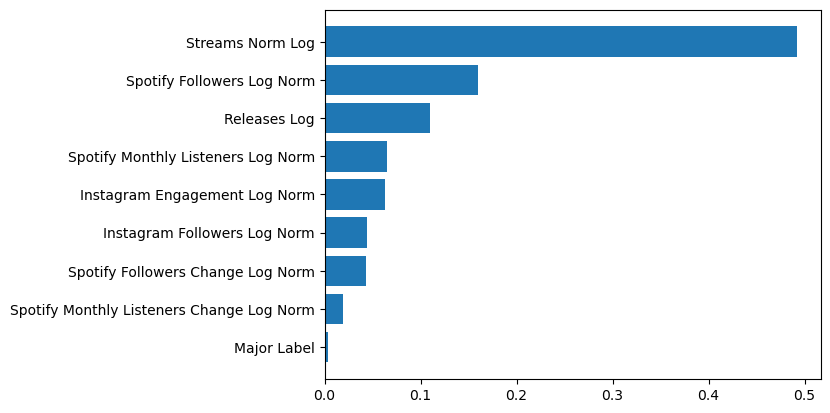

Streams Norm Log                             0.945862
Spotify Followers Log Norm                   0.259579
Spotify Followers Change Log Norm            0.017108
Spotify Monthly Listeners Log Norm           0.041897
Spotify Monthly Listeners Change Log Norm    0.000896
Instagram Followers Log Norm                 0.051081
Instagram Engagement Log Norm                0.029908
Major Label                                  0.001210
Releases Log                                 0.055728
dtype: float64


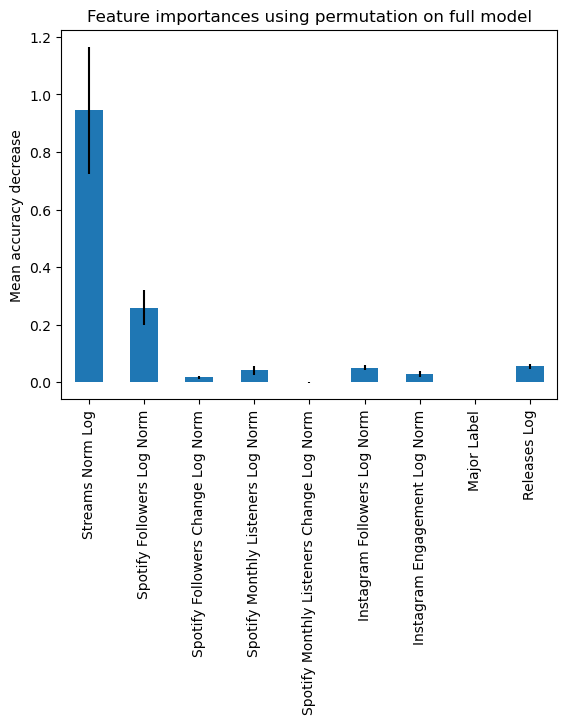

'"\nfn=X_train.columns.values\nfig, axes = plt.subplots(nrows = 50,ncols = 5,figsize = (10,2), dpi=900)\nfor index in range(0, 49):\n    tree.plot_tree(reg.estimators_[index],\n                   feature_names = fn, \n                   class_names=\'Monthly Revenue Log Norm\',\n                   filled = True,\n                   ax = axes[index]);\n\n    axes[index].set_title(\'Estimator: \' + str(index), fontsize = 11)\nfig.savefig(\'rf_5trees.png\')\n'

In [7]:
#features=round(math.sqrt(len(selected_columnsSp)))
features=round(len(selected_columnsSp)/3)
print(len(selected_columnsSp))
print(features)
reg = RandomForestRegressor(n_estimators=200, random_state=0, max_features=features) #max features sqrt(n_features)
reg.fit(X_train_scaled, y_train)

print(pd.Series(abs(reg.feature_importances_), index=selected_columnsSp[1:]))
f_i = list(zip(selected_columnsSp[1:],reg.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i])
plt.show()

from sklearn.inspection import permutation_importance
result = permutation_importance(
    reg, X_test_scaled, y_test, n_repeats=10, random_state=0, n_jobs=2
)
forest_importances = pd.Series(abs(result.importances_mean), index=selected_columnsSp[1:])
print(forest_importances)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
plt.show()

from sklearn import tree
fn=X_train.columns.values
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,8), dpi=1200)
tree.plot_tree(reg.estimators_[0],
               feature_names = fn, 
               class_names="Monthly Revenue Log Norm",
               filled = True);
fig.savefig('rf_individualtree.png')

""""
fn=X_train.columns.values
fig, axes = plt.subplots(nrows = 50,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 49):
    tree.plot_tree(reg.estimators_[index],
                   feature_names = fn, 
                   class_names='Monthly Revenue Log Norm',
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')
"""

Y Predicted:  [0.41341941 0.38890751 0.26475192 0.44440288 0.22672287 0.38347863
 0.81457425 0.69127787 0.42279876 0.46960336 0.47961193 0.37653385
 0.42094286 0.39086599 0.85496898 0.39239846 0.6410598  0.14869546
 0.87880206 0.44840062 0.23376438 0.54507866 0.36930774 0.79293904
 0.2463151  0.37743743 0.44183    0.67931952 0.24704001]
Y Real (Test):  [0.42621944 0.38369601 0.20088413 0.46596387 0.21582717 0.42596243
 0.84072904 0.68700699 0.43532925 0.46814175 0.57124693 0.35359725
 0.44713863 0.3602736  0.89338894 0.41320522 0.69589463 0.1500731
 0.94845873 0.41127462 0.26881341 0.54867633 0.33492492 0.79326539
 0.19626585 0.35901991 0.39144577 0.70117293 0.23685619]


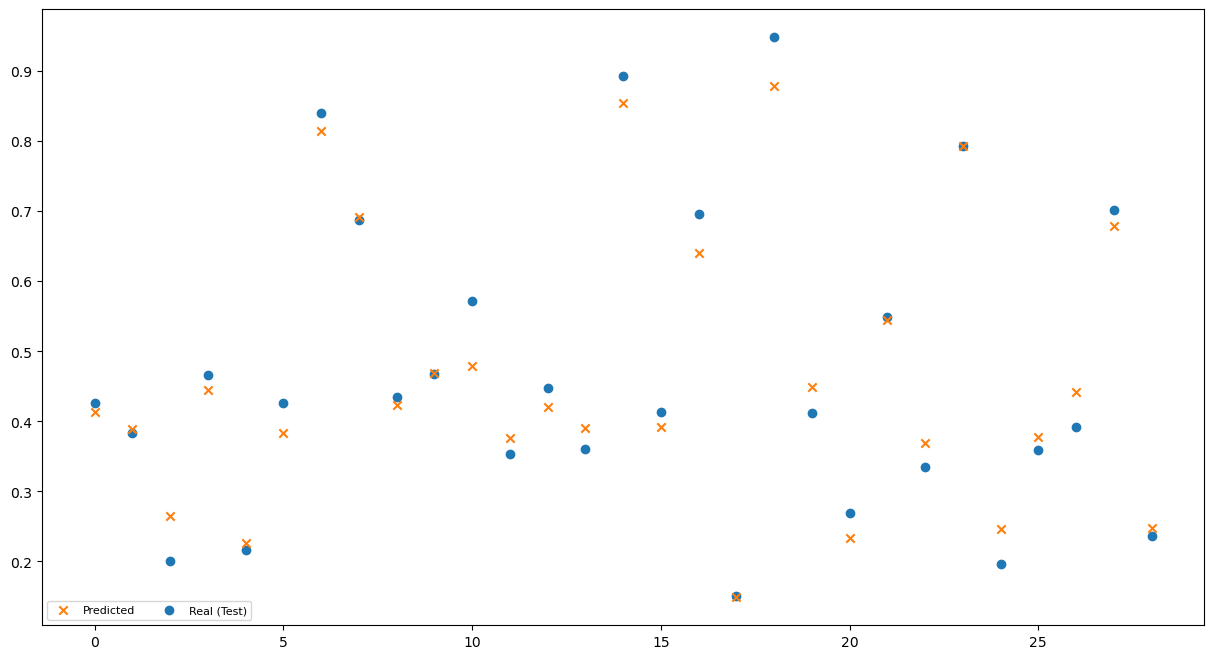

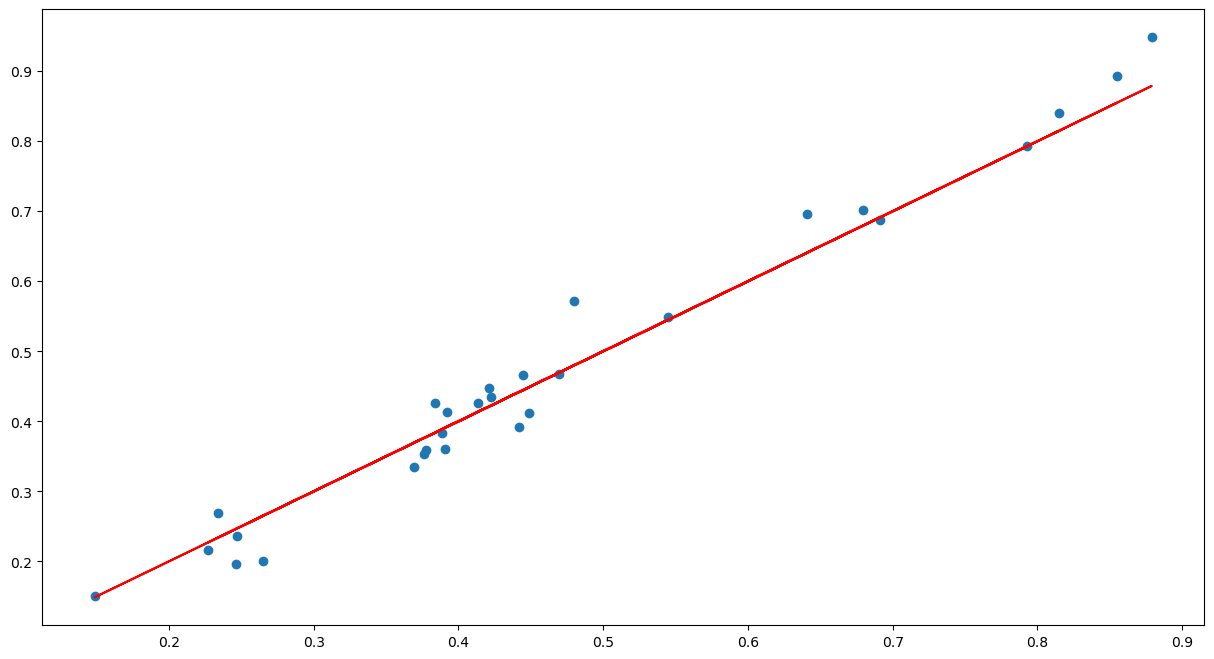

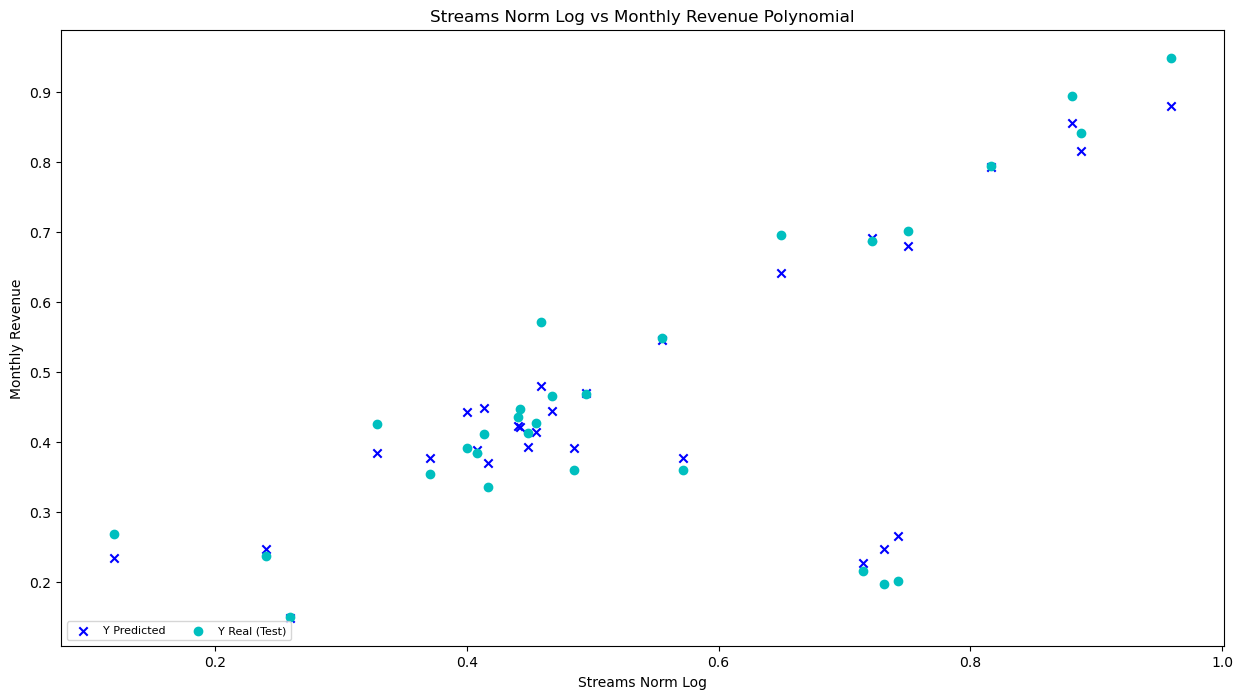

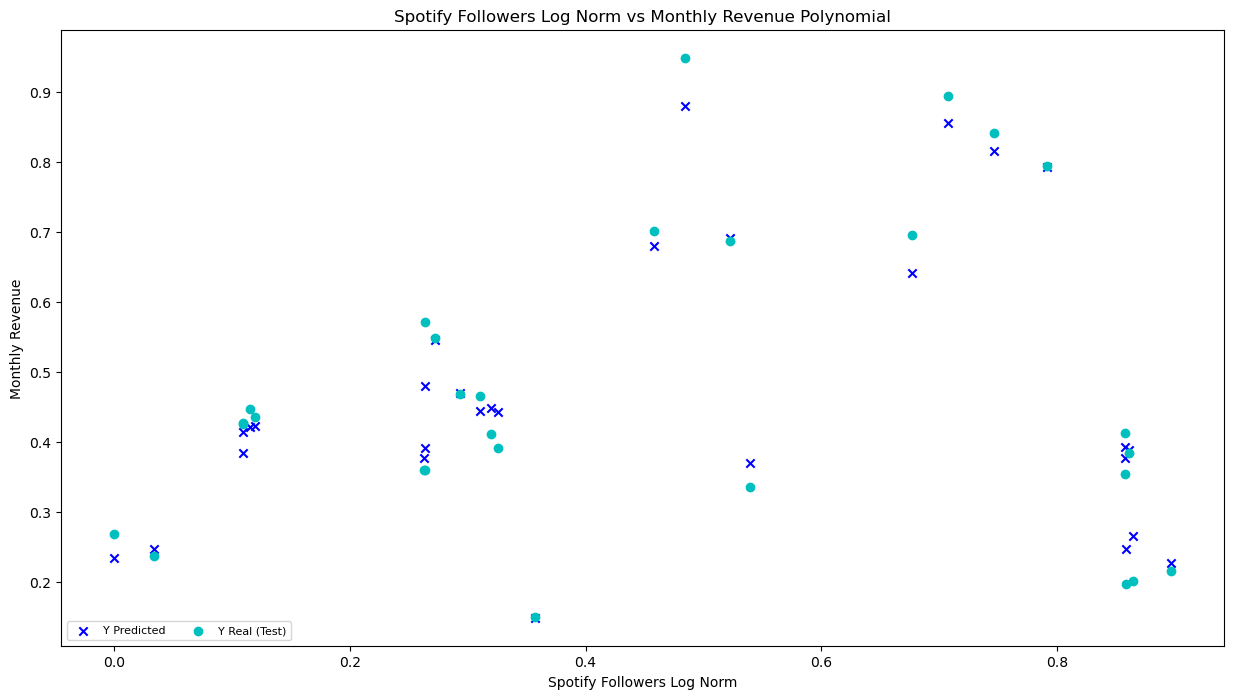

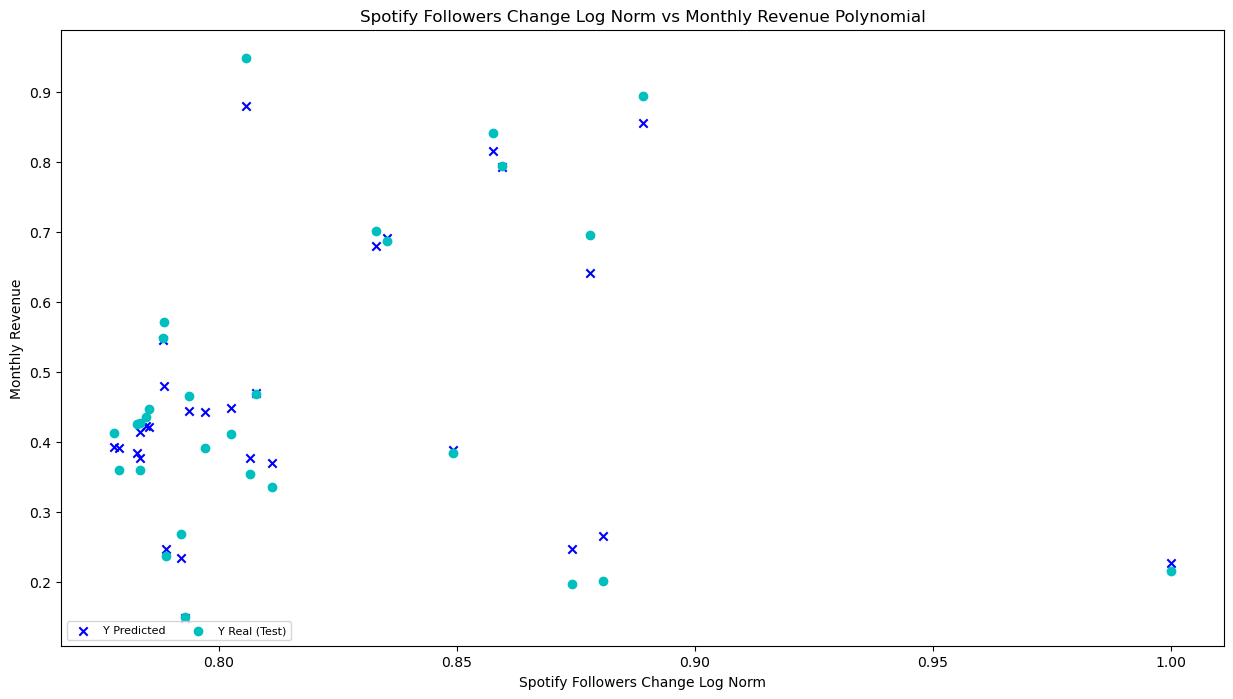

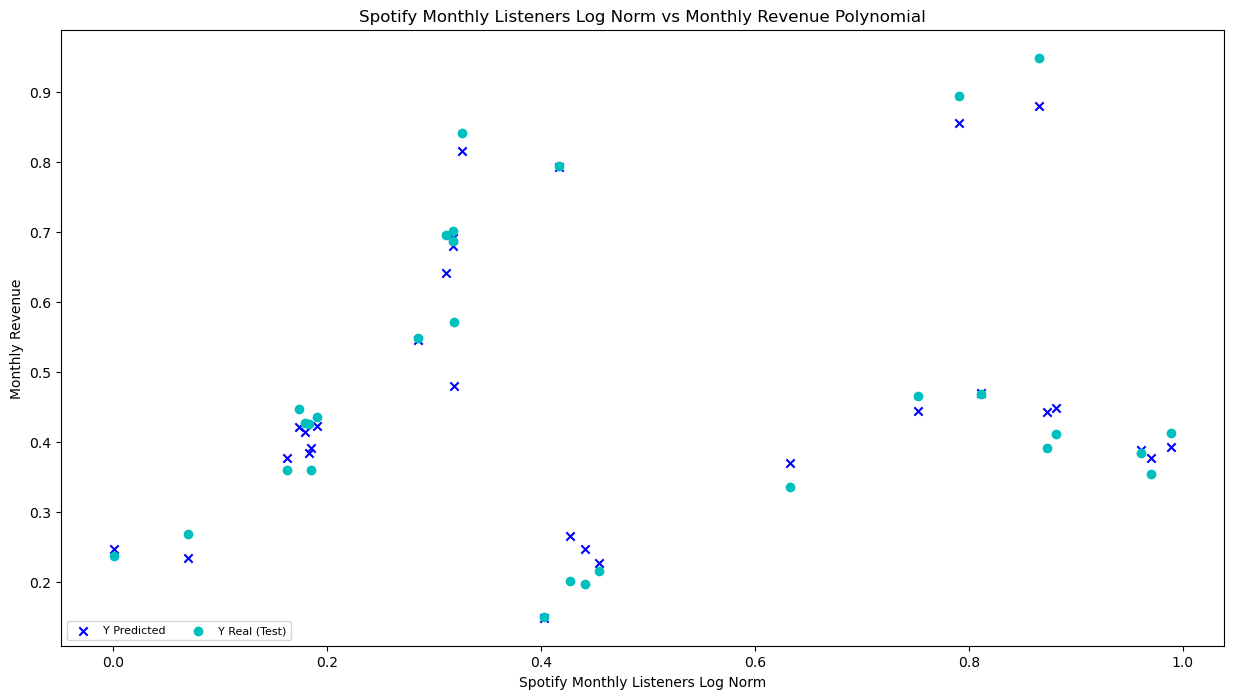

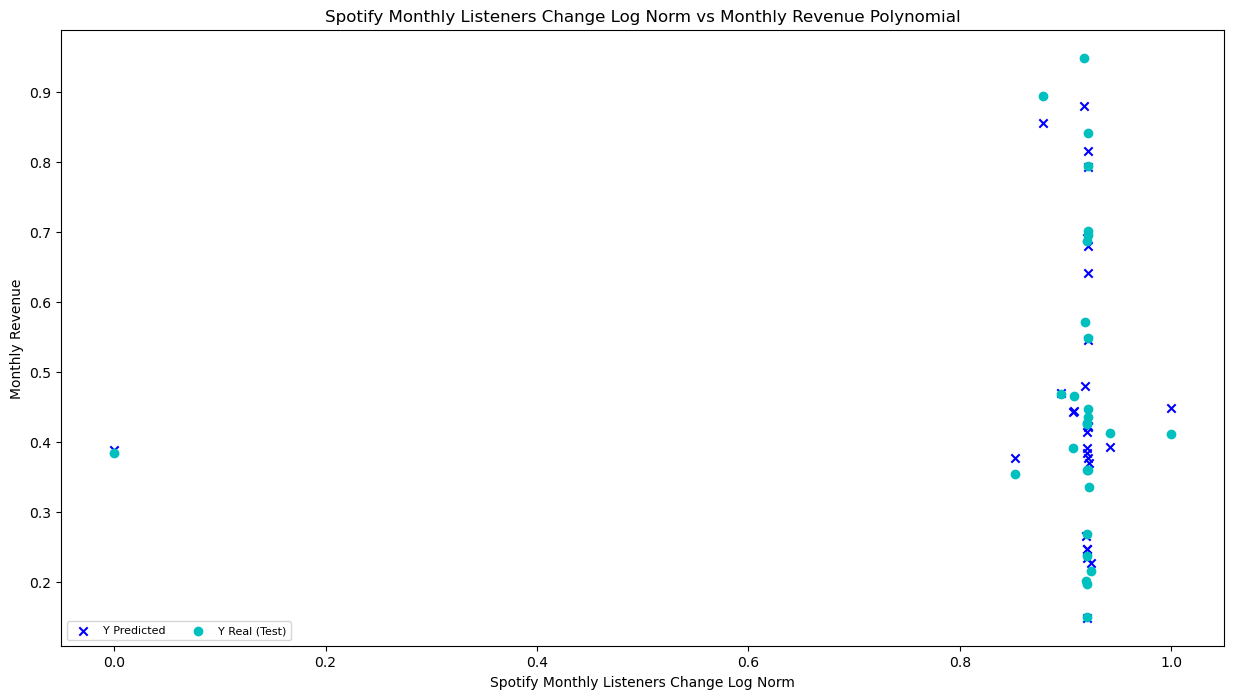

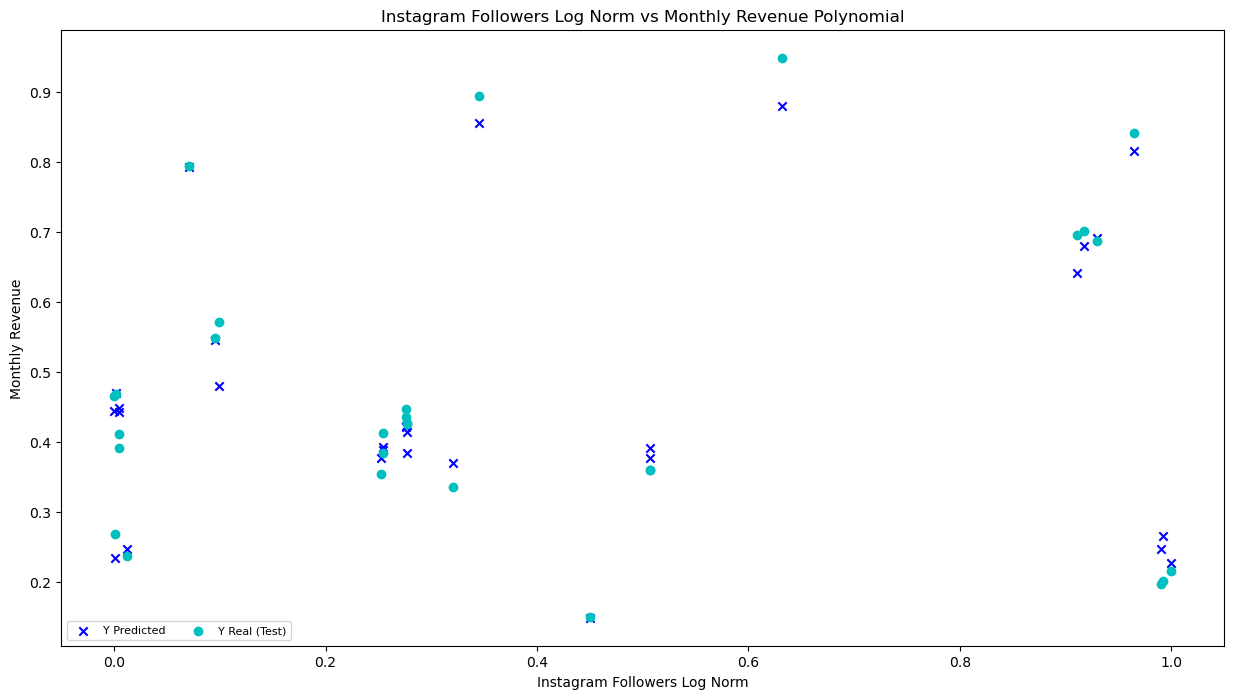

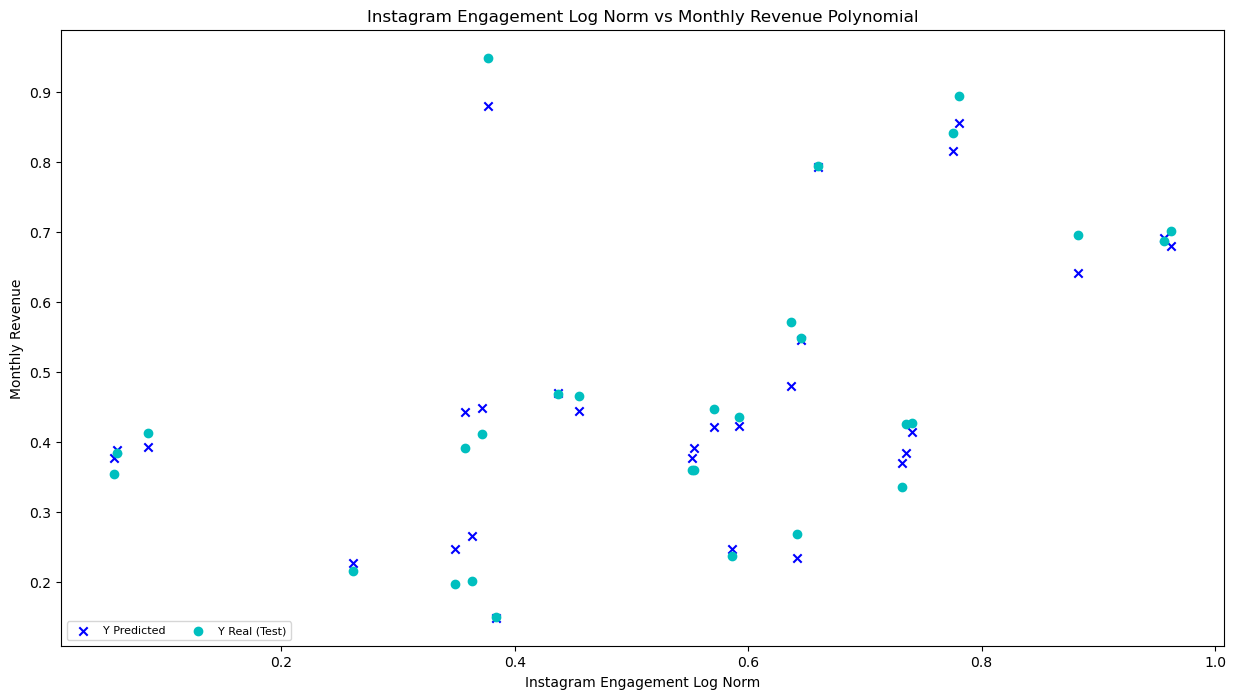

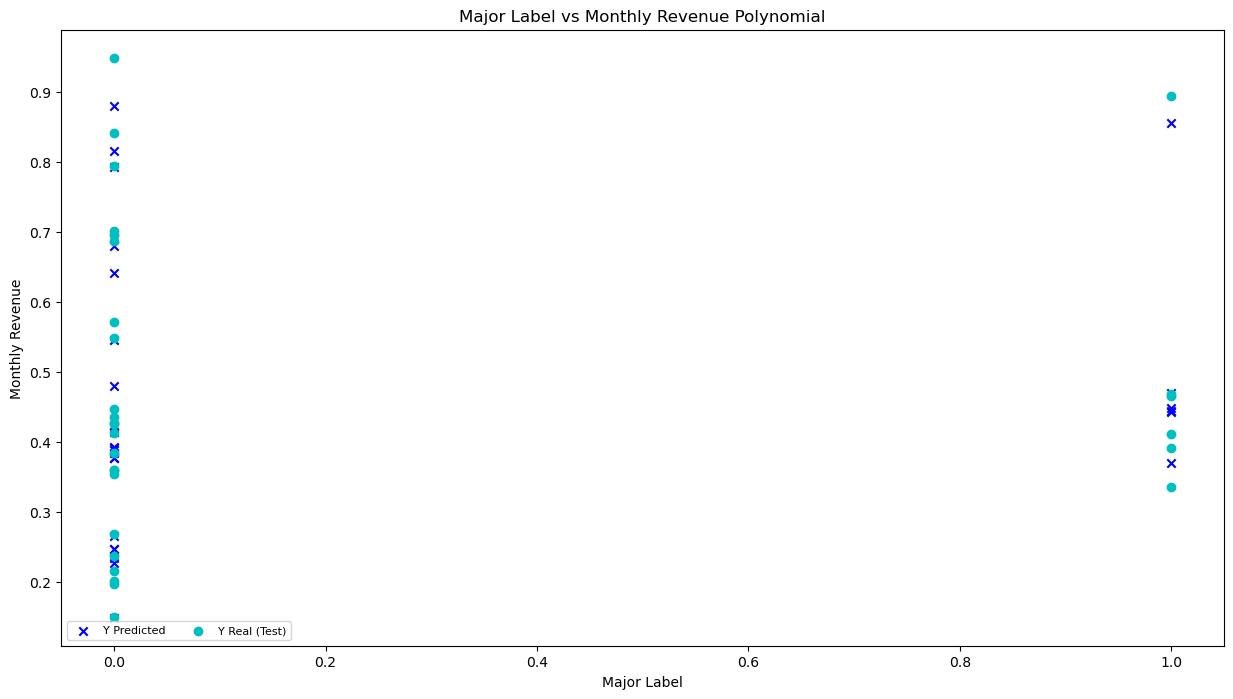

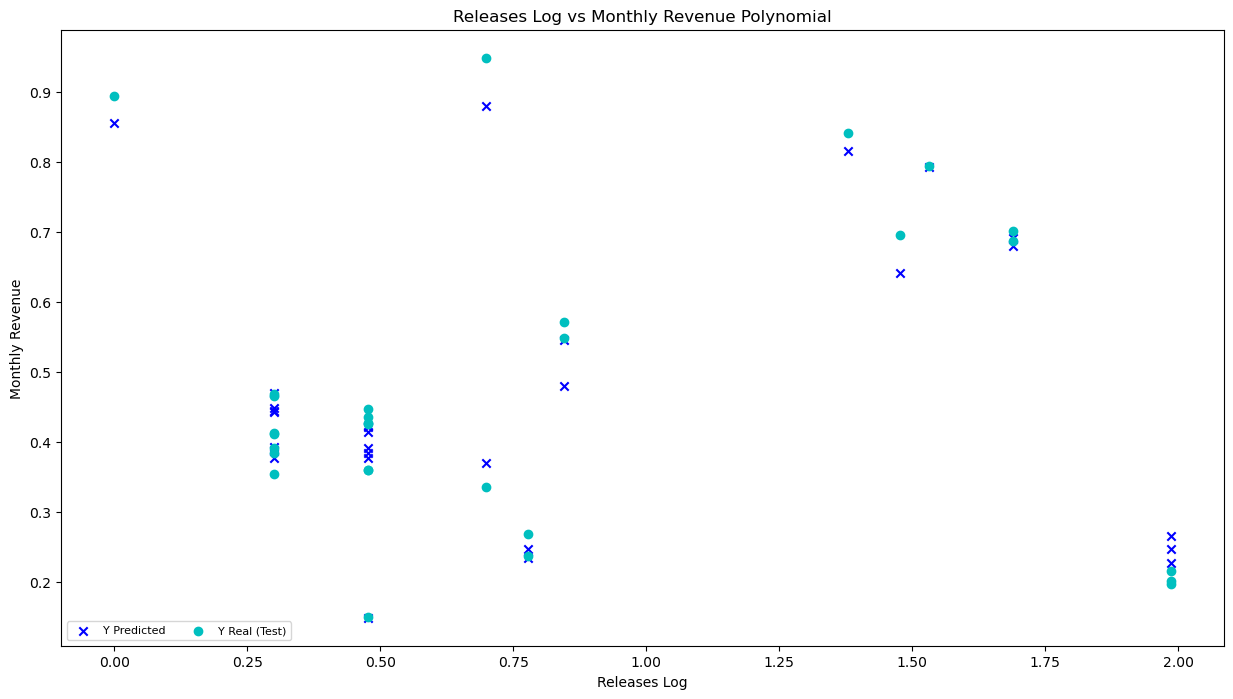

Mean squared error:  0.001296586494993026
Coefficient of determination (R2):  0.9712818347375917
Accuracy: 0.95 (+/- 0.07)
Ajusted R2: 0.97


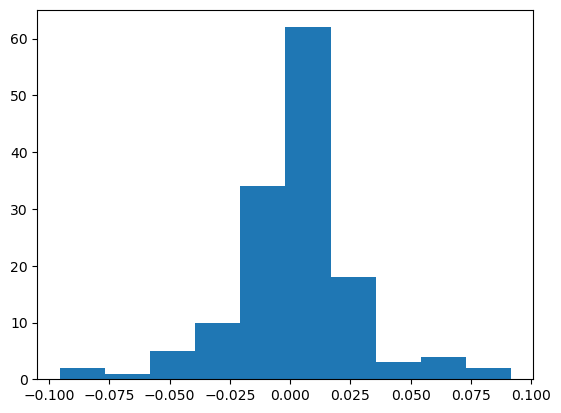

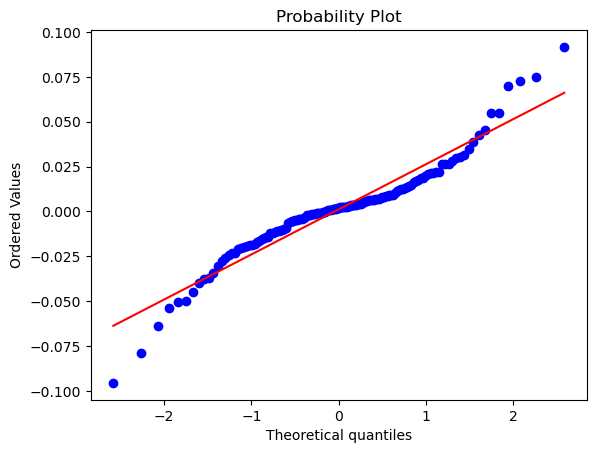

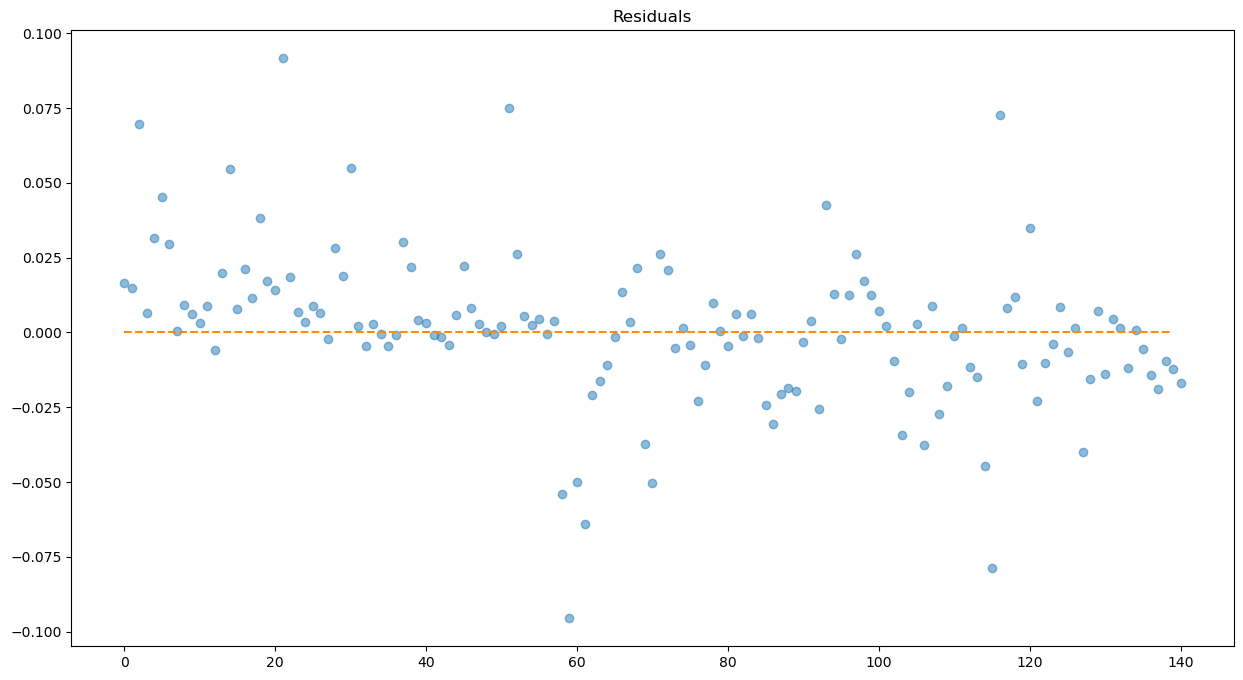

In [8]:
import scipy.stats as stats

#Predict the income with test data
y_prediction = reg.predict(X_test_scaled)
print("Y Predicted: ",y_prediction)
print("Y Real (Test): ", y_test.values)

#Scatter plot Results
plt.figure(figsize = (15,8))
real = plt.scatter(range(0,len(y_test)),y_test, marker='o')
predicted = plt.scatter(range(0,len(y_test)),y_prediction, marker='x')
plt.legend((predicted, real),
           ('Predicted', 'Real (Test)'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

#Scatter plot Results
plt.figure(figsize = (15,8))
result = plt.scatter(y_prediction,y_test)
m, b = np.polyfit(y_prediction, y_prediction, 1)
plt.plot(y_prediction, m*y_prediction+b, color='red')

#Scatter plot Results

for column in X_test.columns:
    plt.figure(figsize = (15,8))
    colors = ['b', 'c']
    predicted = plt.scatter(X_test[column], y_prediction, marker='x', color=colors[0])
    real = plt.scatter(X_test[column], y_test, marker='o', color=colors[1])
    plt.legend((predicted, real),
               ('Y Predicted', 'Y Real (Test)'),
               scatterpoints=1,
               loc='lower left',
               ncol=3,
               fontsize=8)
    plt.title(column+' vs Monthly Revenue Polynomial')
    plt.xlabel(column)
    plt.ylabel('Monthly Revenue')
    plt.show()

#Statistical scores
score=r2_score(y_test,y_prediction)
print("Mean squared error: ", mean_squared_error(y_test, y_prediction))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination (R2): ", r2_score(y_test, y_prediction))    

#Cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg,X_train, y_train, cv=10,scoring='r2')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
#Adjusted R2
Adj_r2 = 1-(1-score)*(len(X_train)-1)/(len(X_train)-len(X_train.columns)-1)
print("Ajusted R2: %0.2f" %Adj_r2)


#RESIDUALS
# compute the residuals and other metrics
residuals=dataset["Monthly Revenue Log Norm"] - reg.predict(scaler.transform(dataset.drop(columns=["Monthly Revenue Log Norm"])))
counts, bins = np.histogram(residuals)
plt.hist(bins[:-1], bins, weights=counts)
fig = plt.figure()
res = stats.probplot(residuals, plot=plt)

#Plot residuals variance
plt.figure(figsize = (15,8))
plt.scatter(x=residuals.index, y=residuals, alpha=0.5)
plt.plot(np.repeat(0, residuals.index.max()), color='darkorange', linestyle='--')
plt.title('Residuals')
plt.show() 